In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# load the dataset
Credit_card_df=pd.read_csv('creditcard.csv')

In [4]:
Credit_card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
Credit_card_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
Credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
#Checking for the missing or null values
Credit_card_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### This is highly imbalance dataset so we need to have same amount of fetaures and target varible 

# 0 --> Normal Transcation 
# 1 --> Fradulengt Transaction

In [8]:
#Separating the data for analaysis
legeit=Credit_card_df[Credit_card_df.Class ==0]
fradu=Credit_card_df[Credit_card_df.Class ==1]

In [9]:
print(legeit.shape)
print(fradu.shape)

(284315, 31)
(492, 31)


In [10]:
# Statistical description of the data
legeit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
fradu.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
# Compair  the values of both Trsancations 
Credit_card_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [13]:
Credit_card_df.groupby('Amount').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
Amount,,,,,,,,,,,,,,,,,,,,,
0.00,89370.688767,0.054099,0.312778,0.510623,1.858651,0.347416,0.202163,-0.389134,-0.004279,-0.227101,...,-0.152165,0.007598,0.249425,-0.022854,-0.031137,0.078709,0.211661,-0.039352,-0.029876,0.014795
0.01,82146.279944,-0.620691,0.457427,0.507827,0.067665,0.152530,0.086442,-0.264066,-0.106977,1.148250,...,0.035782,-0.180137,0.063045,0.030496,0.054680,0.138309,0.063259,0.100271,0.046239,0.006964
0.02,87315.576471,0.170367,-0.274388,0.966057,-1.299248,-0.586961,0.778127,-1.243272,0.148391,0.079912,...,0.036472,0.352341,0.888831,-0.094633,0.102567,0.133680,-0.128601,0.063126,0.011449,0.000000
0.03,99923.333333,-0.327433,-0.505556,0.237874,-1.734726,0.395806,-0.564964,-0.617002,-0.663259,0.157840,...,0.189620,-0.407880,-0.040707,-0.118674,-0.495686,0.651412,-0.291969,-0.027039,-0.091406,0.000000
0.04,91373.000000,-0.336613,-0.782633,0.676427,0.351779,1.030341,-0.487902,-0.847386,0.312604,0.495719,...,0.185313,0.180197,0.404117,0.120962,0.037834,0.005724,-0.201646,-0.005548,0.031668,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11898.09,46253.000000,-21.780665,-38.305310,-12.122469,9.752791,-12.880794,4.256017,14.785051,-2.818253,-0.667338,...,24.133894,7.437478,-5.619439,-10.547038,0.653249,-4.232409,-0.480459,-2.257913,2.082488,0.000000
12910.93,42951.000000,-23.712839,-42.172688,-13.320825,9.925019,-13.945538,5.564891,15.710644,-2.844253,-1.580725,...,26.237391,7.921600,-6.320710,-11.310338,0.404175,-4.547278,-1.577118,-2.357385,2.253662,0.000000
18910.00,95286.000000,-34.549296,-60.464618,-21.340854,16.875344,-19.229075,6.335259,24.422716,-4.964566,0.188912,...,38.117209,11.502580,-9.499423,-16.513186,0.744341,-7.081325,-2.604551,-3.550963,3.250802,0.000000


# trying to get the similiar distribution for the datset

In [14]:
legit_sample=legeit.sample(n=492)

# now we are concating the boith DF becasuse its normal distribution of the data and we need to uswe this DF to train our model

In [15]:
new_df=pd.concat([legit_sample,fradu],axis=0)

# axis 0 used to add row wise data after concating if we use axis 1 it will added the dat into column wise

In [16]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
16404,27777.0,0.987954,-1.294507,-0.385479,-0.758767,-0.793835,-0.323681,-0.241488,-0.094868,-0.977255,...,0.340220,0.306609,-0.423455,-0.477120,0.591723,-0.104177,-0.061537,0.030596,245.55,0
195665,131168.0,-0.139753,0.386013,0.770143,-0.528221,0.240410,0.739744,0.257124,0.220514,0.175209,...,-0.168850,-0.460984,0.137116,0.004717,-0.512929,-0.181443,-0.029127,0.020243,50.75,0
143655,85516.0,-2.111777,-0.478789,1.009745,-2.490715,-1.724848,0.061743,-1.212298,1.203701,-2.330062,...,0.050480,0.224985,-0.143761,-0.347180,0.418876,-0.127685,0.245500,-0.107656,88.00,0
198010,132284.0,2.031245,-0.117051,-1.431803,0.181027,-0.018476,-1.416923,0.418983,-0.433871,0.659915,...,-0.125819,-0.236664,0.167265,0.060757,0.020860,-0.083821,-0.054810,-0.058170,29.00,0
269534,163678.0,2.080850,0.197727,-1.713512,0.399306,0.488883,-0.838552,0.218749,-0.262637,0.418605,...,-0.362653,-0.911218,0.327698,0.496234,-0.232972,0.173308,-0.059185,-0.030023,0.89,0


In [17]:
new_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [18]:
new_df.value_counts()

Time      V1          V2          V3          V4         V5          V6         V7          V8          V9         V10         V11        V12         V13        V14         V15        V16         V17         V18        V19        V20        V21         V22        V23        V24        V25        V26        V27        V28        Amount   Class
68207.0   -13.192671   12.785971  -9.906650    3.320337  -4.801176    5.760059  -18.750889  -37.353443  -0.391540  -5.052502    4.406806  -4.610756   -1.909488  -9.072711   -0.226074  -6.211557   -6.248145   -3.149247   0.051576  -3.493050   27.202839  -8.887017   5.303607  -0.639435   0.263203  -0.108877   1.269566   0.939407  1.00     1        6
94362.0   -26.457745   16.497472  -30.177317   8.904157  -17.892600  -1.227904  -31.197329  -11.438920  -9.462573  -22.187089   4.419997  -10.592305  -0.703796  -3.926207   -2.400246  -6.809890   -12.462315  -5.501051  -0.567940   2.812241  -8.755698    3.460893   0.896538   0.254836  -0.738097  -0.96656

Text(0.5, 1.0, 'Class Distribution')

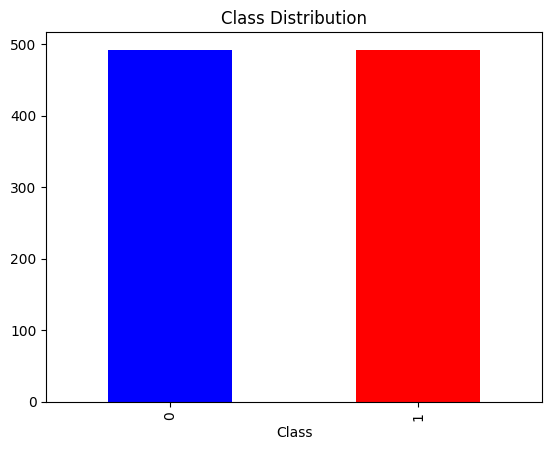

In [20]:
new_df['Class'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Class Distribution')

In [21]:
# Now check the mean valkue so that we can get idea baout the datset which we are uusing are the same one and getting the result for our own traing

new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,97860.481707,-0.004427,-0.041832,-0.016491,-0.035091,-0.046426,0.003211,0.060718,-0.077319,0.015151,...,0.005519,-0.058231,-0.008010,0.002549,-0.032326,-0.035998,-0.006589,0.005764,0.011092,102.946890
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Splitting the data into features and target variable

In [23]:
X= new_df.drop(columns='Class', axis=1)
Y = new_df['Class']

In [24]:
print(Y)

16404     0
195665    0
143655    0
198010    0
269534    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [30]:
 # sploit the datset into train and split and start taing our model

X_train, X_test,Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [33]:
# model training for logistic regression
model = LogisticRegression()

In [34]:
model.fit(X_train, Y_train)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
## Accuracy on Traning data

X_train_pred=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_pred, Y_train)
print('Accuracy on training data:', training_data_accuracy*100) 

Accuracy on training data: 94.66327827191868


In [40]:
# Accuracy on test data
 
X_test_pred=model.predict(X_test)
training_test_accuracy = accuracy_score(X_test_pred, Y_test)
print('Accuracy on test data:', training_test_accuracy*100)

Accuracy on test data: 94.41624365482234
